In [58]:
from huggingface_hub import login
from esm.models.esm3 import ESM3
from esm.sdk.api import ESM3InferenceClient, ESMProtein, GenerationConfig

# Will instruct you how to get an API key from huggingface hub, make one with "Read" permission.
login()

# This will download the model weights and instantiate the model on your machine.
model: ESM3InferenceClient = ESM3.from_pretrained("esm3-open").to("cpu") # or "cuda"

# Generate a completion for a partial Carbonic Anhydrase (2vvb)
prompt = "___________________________________________________DQATSLRILNNGHAFNVEFDDSQDKAVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAVLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPP___________________________________________________________"
protein = ESMProtein(sequence=prompt)
# Generate the sequence, then the structure. This will iteratively unmask the sequence track.
protein = model.generate(protein, GenerationConfig(track="sequence", num_steps=8, temperature=0.7))
# We can show the predicted structure for the generated sequence.
protein = model.generate(protein, GenerationConfig(track="structure", num_steps=8))
protein.to_pdb("./generation.pdb")
# Then we can do a round trip design by inverse folding the sequence and recomputing the structure
protein.sequence = None
protein = model.generate(protein, GenerationConfig(track="sequence", num_steps=8))
protein.coordinates = None
protein = model.generate(protein, GenerationConfig(track="structure", num_steps=8))
protein.to_pdb("./round_tripped.pdb")

100%|███████████████████████████████████████████████| 8/8 [00:09<00:00,  1.14s/it]
/Users/yoshids/miniconda3/lib/python3.12/site-packages/esm/utils/structure/protein_complex.py:223: UserWarning: Entity ID not found in metadata, using None as default
  warnings.warn("Entity ID not found in metadata, using None as default")
/Users/yoshids/miniconda3/lib/python3.12/site-packages/esm/models/vqvae.py:286: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast(enabled=False):  # type: ignore
100%|███████████████████████████████████████████████| 8/8 [00:08<00:00,  1.04s/it]


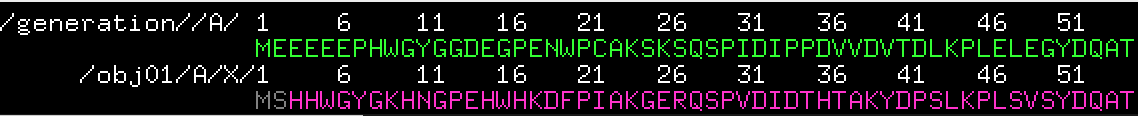

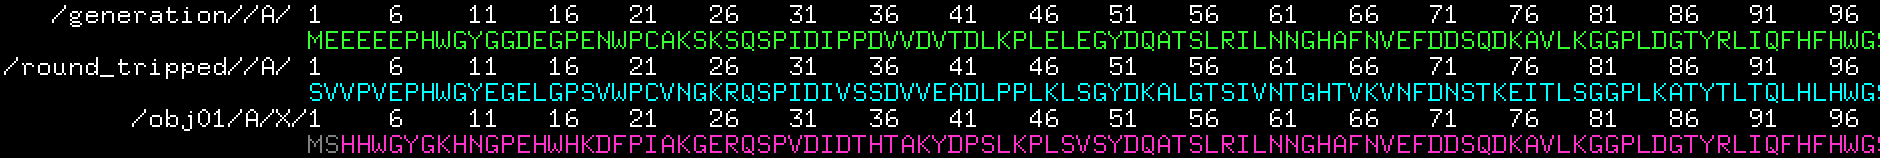

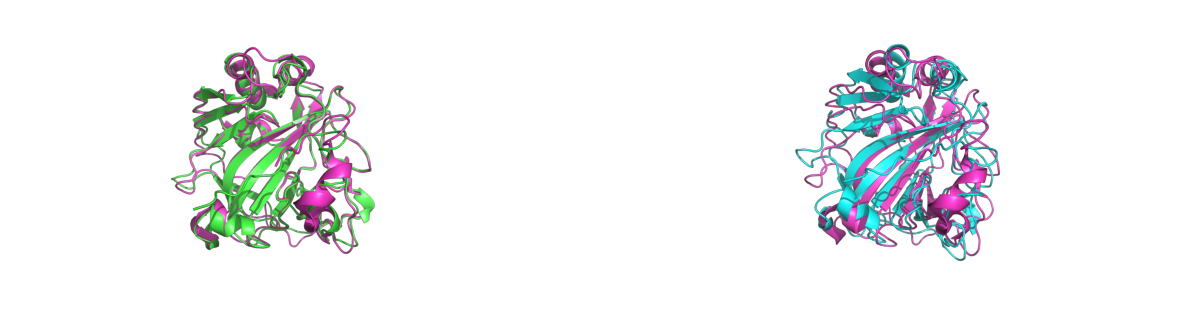

In [19]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
from IPython.display import display


fig, ax = plt.subplots(1,2, figsize=(15,5))
img_A = mpimg.imread('superpose_1.png')
img_B = mpimg.imread('superpose_2.png')

ax[0].imshow(img_A)
ax[0].axis('off')
ax[1].imshow(img_B)
ax[1].axis('off')

x = Image(filename='seq_1.png') 
y = Image(filename='seq_2.png') 
display(x, y)

####  Green structure is generated by ESM3, magenta structure is the crystal structure of 2vvb. 
#### The seq on the top shows the seq by ESM3 (green), and original sequence from the crystal structure (magenta)
#### The seq in the middle shows the seq by ESM3 (green), the seq generated from reverse folding in ESM3 (green), and original sequence from the crystal structure (magenta)

# Now insert a random blank space in MAT2A (7KCC)

In [3]:
## full sequence of 7KCC
full_seq='SMNGQLNGFHEAFIEEGTFLFTSESVGEGHPDKICDQISDAVLDAHLQQDPDAKVACETVAKTGMILLAGEITSRAAVDYQKVVREAVKHIGYDDSSKGFDYKTCNVLVALEQQSPDIAQGVHLDRNEEDIGAGDQGLMFGYATDETEECMPLTIVLAHKLNAKLAELRRNGTLPWLRPDSKTQVTVQYMQDRGAVLPIRVHTIVISVQHDEEVCLDEMRDALKEKVIKAVVPAKYLDEDTIYHLQPSGRFVIGGPQGDAGLTGRKIIVDTYGGWGAHGGGAFSGKDYTKVDRSAAYAARWVAKSLVKGGLCRRVLVQVSYAIGVSHPLSISIFHYGTSQKSERELLEIVKKNFDLRPGVIVRDLDLKKPIYQRTAAYGHFGRDSFPWEVPKKLKY'

In [4]:
## check the length of seq
len(full_seq)

396

In [5]:
## Now insert a random blank space in MAT2A (7KCC)
import random

random_indices = random.sample(range(len(full_seq)), k=200)
sub_seq = ''.join((char if idx not in random_indices else '_') 
                  for idx, char in enumerate(full_seq)) 

In [6]:
## check the sequence of new one
sub_seq

'SM___LNGF_E_FI__GTF_FT_ES_____P_KI______AVLDAH__Q__D__VA_E__AK___IL____I__RAAV__Q___REA__HIGYDD_S_____K_CNVLV_LE__SP__A_GVHL__N__DIG________G_A__E____MP_TI_LA_K_N__LA___R_GTL_WL_PD_______Q_M_D__A__P__VH_I_IS_Q__EE_CL___R_A___K___AV__AKY_DEDT____Q___R_V___P_GD_G_T_R_IIVDT_G_W___GG__FSG_D__KV__SAA__A___A_S__KGG__RR_LVQVSYA_G_SH__S_S__H__T_Q__E_ELLE__K_N___RPG____DLD__KP_Y_RTAAYGHF_RDS_P_____K___'

In [7]:
## check the length of the new sequence
len(sub_seq)

396

In [19]:
## more control of substitution
random_indices = random.sample(range(380), k=380)
sub_seq_2 = ''.join((char if idx not in random_indices else '_') 
                  for idx, char in enumerate(full_seq)) 

In [20]:
## check the sequence of new one
sub_seq_2

'____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________FGRDSFPWEVPKKLKY'

In [21]:
## check the length of the new sequence
len(sub_seq_2)

396

In [22]:
## check how many letters were substituted
sub_seq_2.count('_')

380

In [12]:
## now set a def 
def Model_gen(Inp):
    from huggingface_hub import login
    from esm.models.esm3 import ESM3
    from esm.sdk.api import ESM3InferenceClient, ESMProtein, GenerationConfig

    # Will instruct you how to get an API key from huggingface hub, make one with "Read" permission.
    login()

    # This will download the model weights and instantiate the model on your machine.
    model: ESM3InferenceClient = ESM3.from_pretrained("esm3-open").to("cpu") # or "cuda"


    
    ## forst count how many substitution the seq has
    num=Inp.count('_')
    ## put input 
    prompt=Inp
    protein = ESMProtein(sequence=prompt)
    # Generate the sequence, then the structure. This will iteratively unmask the sequence track.
    protein = model.generate(protein, GenerationConfig(track="sequence", num_steps=8, temperature=0.7))
    # We can show the predicted structure for the generated sequence.
    protein = model.generate(protein, GenerationConfig(track="structure", num_steps=8))
    protein.to_pdb("./generation_"+str(num)+".pdb")

In [23]:
## check if this works
Model_gen(sub_seq_2)

100%|███████████████████████████████████████████████| 8/8 [00:15<00:00,  1.89s/it]
/Users/yoshids/miniconda3/lib/python3.12/site-packages/esm/utils/structure/protein_complex.py:223: UserWarning: Entity ID not found in metadata, using None as default
  warnings.warn("Entity ID not found in metadata, using None as default")


(0.0, 1.0, 0.0, 1.0)

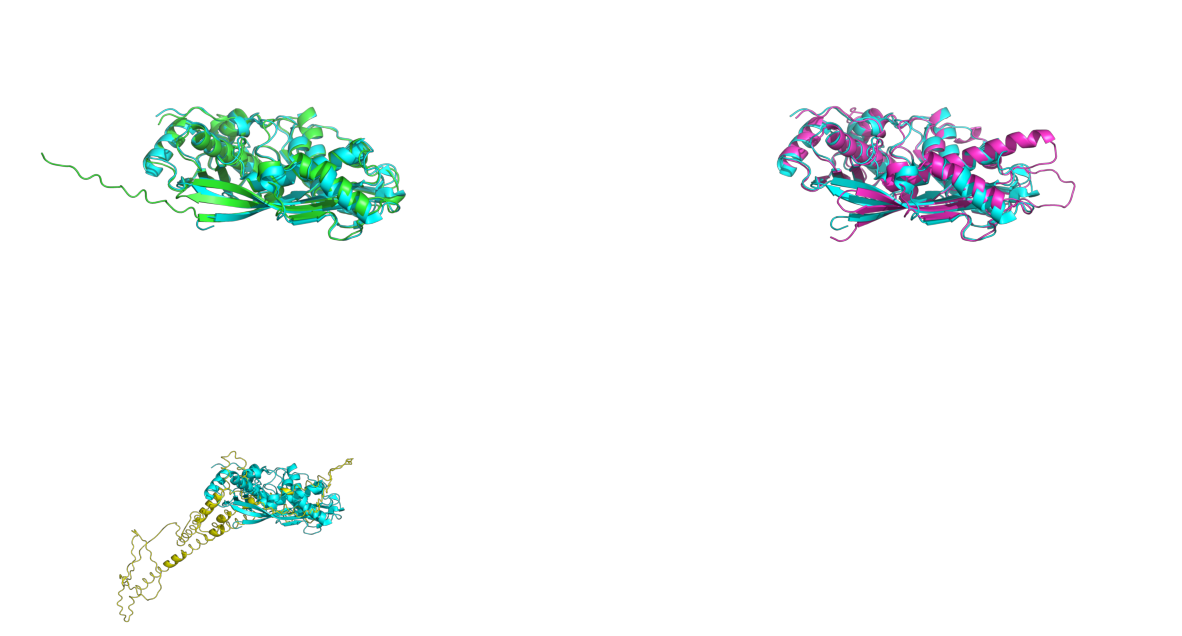

In [34]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
from IPython.display import display


fig, ax = plt.subplots(2,2, figsize=(15,8))
img_A = mpimg.imread('ESM_random_200.png')
img_B = mpimg.imread('ESM_random_250.png')
img_C = mpimg.imread('ESM_random_380.png')

ax[0,0].imshow(img_A, aspect='auto')
ax[0,0].axis('off')
ax[0,1].imshow(img_B, aspect='auto')
ax[0,1].axis('off')
ax[1,0].imshow(img_C, aspect='auto')
ax[1,0].axis('off')
ax[1,1].axis('off')

### sub200 (green) and 7kcc (blue) RMSD=0.97 
### sub250 (magenta) and 7kcc (blue) RMSD=1.71
### sub380 (yellow, substition was introduced for first 380 residue) and 7kcc (blue) RMSD=8.82